In [2]:
import numpy as np
from pylab import *
import sys

N = 100  # データ数

def f(x, a, b):
    return a * x + b

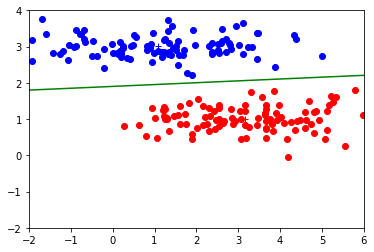

In [8]:
if __name__ == "__main__":
    # 訓練データを作成
    cls1 = []
    cls2 = []
    
    # データは正規分布に従って生成
    mean1 = [1, 3]  # クラス1の平均
    mean2 = [3, 1]  # クラス2の平均
    cov = [[2.0,0.0], [0.0, 0.1]]  # 共分散行列（全クラス共通）
    
    # データ作成
    cls1.extend(np.random.multivariate_normal(mean1, cov, N))
    cls2.extend(np.random.multivariate_normal(mean2, cov, N))
    
    # 各クラスの平均をプロット
    m1 = np.mean(cls1, axis=0)
    m2 = np.mean(cls2, axis=0)
    plot([m1[0]], [m1[1]], 'b+')
    plot([m2[0]], [m2[1]], 'r+')
    
    # 総クラス内共分散行列を計算
    Sw = zeros((2, 2))
    for n in range(len(cls1)):
        xn = matrix(cls1[n]).reshape(2, 1)
        m1 = matrix(m1).reshape(2, 1)
        Sw += (xn - m1) * transpose(xn - m1)
    for n in range(len(cls2)):
        xn = matrix(cls2[n]).reshape(2, 1)
        m2 = matrix(m2).reshape(2, 1)
        Sw += (xn - m2) * transpose(xn - m2)
    Sw_inv = np.linalg.inv(Sw)
    w = Sw_inv * (m2 - m1)
    
    # 訓練データを描画
    x1, x2 = np.transpose(np.array(cls1))
    plot(x1, x2, 'bo')
    
    x1, x2 = np.transpose(np.array(cls2))
    plot(x1, x2, 'ro')
    
    # 識別境界を描画
    # wは識別境界と直交するベクトル
    a = - (w[0,0] / w[1,0])  # 識別直線の傾き
    
    # 傾きがaでmを通る直線のy切片bを求める
    m = (m1 + m2) / 2
    b = -a * m[0,0] + m[1,0]  # 識別直線のy切片
    
    x1 = np.linspace(-2, 6, 1000)
    x2 = [f(x, a, b) for x in x1]
    plot(x1, x2, 'g-')
    
    xlim(-2, 6)
    ylim(-2, 4)
    show()


In [10]:
w[0,0] 

0.004947987123368802

In [12]:
w[1,0]

-0.09702315067329768

In [13]:
w

matrix([[ 0.00494799],
        [-0.09702315]])

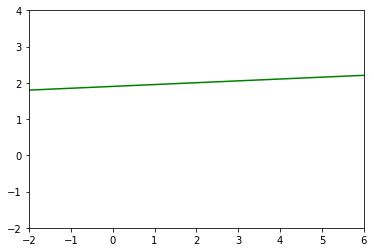

In [17]:
a = - (w[0,0]/ w[1,0])  # 識別直線の傾き

# 傾きがaでmを通る直線のy切片bを求める
m = (m1 + m2) / 2
b = -a * m[0,0] + m[1,0]  # 識別直線のy切片

x1 = np.linspace(-2, 6, 1000)
x2 = [f(x, a, b) for x in x1]
plot(x1, x2, 'g-')

xlim(-2, 6)
ylim(-2, 4)
show()


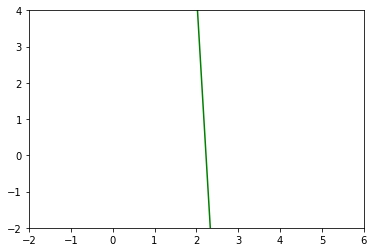

In [18]:
a = (w[1,0] / w[0,0])  # 識別直線の傾き

# 傾きがaでmを通る直線のy切片bを求める
m = (m1 + m2) / 2
b = -a * m[0,0] + m[1,0]  # 識別直線のy切片

x1 = np.linspace(-2, 6, 1000)
x2 = [f(x, a, b) for x in x1]
plot(x1, x2, 'g-')

xlim(-2, 6)
ylim(-2, 4)
show()

In [29]:
w1 = np.array([-0.1, -0.1, 0.2, 0.4, 0.9])
w2 = np.array([0, 0.2, -0.2, 0.9, -0.3])
w  = np.array([[-0.1, -0.1, 0.2, 0.4, 0.9],[0, 0.2, -0.2, 0.9, -0.3]])
x1 = np.array([1.2, 1.4, 0.3, 6.0, 4.6])
x2 = np.array([1.4, 1.4, 0.3, 0.7, 2.1])
x3 = np.array([0.8, 0.3, 1.6, 3.6, 9.2])
x4 = np.array([2.5, -1.1, 0, -0.8, 1])

In [30]:
X1 = sum(w * x1, axis = 1)
X2 = sum(w * x2, axis = 1)
X3 = sum(w * x3, axis = 1)
X4 = sum(w * x4, axis = 1)

In [36]:
print(np.sqrt(sum((X1- X4)**2)))
print(np.sqrt(sum((X2- X4)**2)))
print(np.sqrt(sum((X3- X4)**2)))

8.052353693175679
2.1004047229046123
9.601650899715112


In [32]:
X1, X2, X3, X4

(array([6.34, 4.24]),
 array([1.95, 0.22]),
 array([9.93, 0.22]),
 array([ 0.44, -1.24]))